In [2]:
import numpy as np
import pandas as pd
import datetime 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('VN_housing_dataset.csv')
df.head()

,Unnamed: 0,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,0.0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,1.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2.0,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²
3,3.0,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,51 m²,12.75 m,4 m,100 triệu/m²
4,4.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,36 m²,9 m,4 m,"86,11 triệu/m²"


## DATA PREPROCESSING

In [4]:
df_cleaned = df.rename(columns = {'Ngày': 'Date', "Địa chỉ":"address", "Quận":"district", 
                                "Huyện":"ward", "Loại hình nhà ở":"house_type",
                                "Giấy tờ pháp lý":"legal_paper", "Số tầng":"floors",
                                "Số phòng ngủ":"bedrooms", "Diện tích":"Area(m2)",
                                "Dài":"length_meter", "Rộng":"width_meter", "Giá/m2":"Price/m2"})
df_cleaned = df_cleaned.drop("Unnamed: 0", axis = 1)
df_cleaned = df_cleaned.dropna()
df_cleaned = df_cleaned.reset_index()


Clean columns and convert numerical columns to float type

In [5]:
columns_to_clean = ['district', 'ward','floors','bedrooms','Area(m2)','length_meter','width_meter']

for col in columns_to_clean:
    df_cleaned[col] = df_cleaned[col].str.replace('Quận', '', regex=False)
    df_cleaned[col] = df_cleaned[col].str.replace('Phường', '', regex=False)
    df_cleaned[col] = df_cleaned[col].str.replace('phòng', '', regex=False)
    df_cleaned[col] = df_cleaned[col].str.replace('m²', '', regex=False)
    df_cleaned[col] = df_cleaned[col].str.replace('m', '', regex=False)
    df_cleaned[col] = df_cleaned[col].str.replace('m', '', regex=False)
    df_cleaned[col] = df_cleaned[col].str.strip()  # Xóa khoảng trắng thừa
df_cleaned.info()


    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11473 entries, 0 to 11472
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         11473 non-null  int64 
 1   Date          11473 non-null  object
 2   address       11473 non-null  object
 3   district      11473 non-null  object
 4   ward          11473 non-null  object
 5   house_type    11473 non-null  object
 6   legal_paper   11473 non-null  object
 7   floors        11473 non-null  object
 8   bedrooms      11473 non-null  object
 9   Area(m2)      11473 non-null  object
 10  length_meter  11473 non-null  object
 11  width_meter   11473 non-null  object
 12  Price/m2      11473 non-null  object
dtypes: int64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df_cleaned = df_cleaned[df_cleaned['floors'] != 'Nhiều hơn 10']
df_cleaned = df_cleaned[df_cleaned['bedrooms'] != 'nhiều hơn 10']

In [7]:
df_cleaned.loc[df_cleaned['Price/m2'].str.contains(' tỷ/m²'), 'Price/m2'] = df_cleaned.loc[df_cleaned['Price/m2'].str.contains(' tỷ/m²'), 'Price/m2'].str.replace(' tỷ/m²','').str.replace('.','').str.replace(',','.').astype(float) * 1000
df_cleaned.loc[df_cleaned['Price/m2'].str.contains(' triệu/m²', na=False), 'Price/m2'] = df_cleaned.loc[df_cleaned['Price/m2'].str.contains(' triệu/m²', na=False), 'Price/m2'].str.replace(' triệu/m²','').str.replace(',','.').astype(float)
df_cleaned.loc[df_cleaned['Price/m2'].str.contains(' đ/m²', na=False), 'Price/m2'] = df_cleaned.loc[df_cleaned['Price/m2'].str.contains(' đ/m²', na=False), 'Price/m2'].str.replace(' đ/m²','').str.replace('.','').astype(float) * 0.000001


In [8]:
for col in ['floors','bedrooms','Area(m2)','length_meter','width_meter','Price/m2' ]:
    df_cleaned[col] = df_cleaned[col].astype('float')
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11313 entries, 0 to 11472
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         11313 non-null  int64  
 1   Date          11313 non-null  object 
 2   address       11313 non-null  object 
 3   district      11313 non-null  object 
 4   ward          11313 non-null  object 
 5   house_type    11313 non-null  object 
 6   legal_paper   11313 non-null  object 
 7   floors        11313 non-null  float64
 8   bedrooms      11313 non-null  float64
 9   Area(m2)      11313 non-null  float64
 10  length_meter  11313 non-null  float64
 11  width_meter   11313 non-null  float64
 12  Price/m2      11313 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 1.2+ MB


In [9]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
index,11313.0,41669.792540,2.366562e+04,2.000000,21363.00,41600.00,62151.00,8.236200e+04
floors,11313.0,4.397065,1.818701e+00,1.000000,4.00,4.00,5.00,7.300000e+01
bedrooms,11313.0,3.869884,1.368288e+00,1.000000,3.00,4.00,4.00,1.000000e+01
Area(m2),11313.0,54.570583,4.547308e+02,1.000000,33.00,40.00,52.00,4.000000e+04
length_meter,11313.0,45.741291,1.234976e+03,1.000000,8.00,10.00,12.00,1.200000e+05
width_meter,11313.0,17.793300,2.015967e+02,1.000000,3.70,4.00,5.00,5.500000e+03
Price/m2,11313.0,64652.661766,6.844541e+06,0.054081,70.19,89.39,114.56,7.280000e+08


Create dummies for categorical columns

In [10]:
dummy_house_type = pd.get_dummies(df_cleaned.house_type, prefix="housing_type")
dummy_legal_paper = pd.get_dummies(df_cleaned.legal_paper, prefix="legal_paper")
dummy_district = pd.get_dummies(df_cleaned.district, prefix="district")
dummy_ward = pd.get_dummies(df_cleaned.ward, prefix="ward")

df_housing = pd.concat([df_cleaned, dummy_house_type, dummy_legal_paper, dummy_district, dummy_ward], axis=1).drop(['index', 'Date', 'address', 'district', 'ward', 'house_type', 'legal_paper'], axis = 1)

df_housing = df_housing.replace({False: 0, True: 1})
df_housing


C:\Users\AD\AppData\Local\Temp\ipykernel_19720\846929038.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_housing = df_housing.replace({False: 0, True: 1})


,floors,bedrooms,Area(m2),length_meter,width_meter,Price/m2,housing_type_Nhà biệt thự,"housing_type_Nhà mặt phố, mặt tiền","housing_type_Nhà ngõ, hẻm",housing_type_Nhà phố liền kề,...,ward_Đại Mỗ,ward_Định Công,ward_Đống Mác,ward_Đồng Mai,ward_Đồng Nhân,ward_Đồng Tâ,ward_Đồng Xuân,ward_Đội Cấn,ward_Đức Giang,ward_Đức Thắng
0,4.0,4.0,40.0,10.0,4.0,65.00,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,4.0,52.0,12.0,4.2,93.27,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,5.0,90.0,18.0,5.0,108.89,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,3.0,32.0,6.6,4.5,60.94,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,2.0,42.0,11.0,4.0,29.76,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11467,6.0,6.0,65.0,13.0,5.0,192.31,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11468,2.0,2.0,37.0,13.0,3.0,43.24,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11470,5.0,4.0,80.0,14.0,5.0,262.50,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11471,3.0,5.0,89.0,20.0,4.0,258.43,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
len(df_housing)
print("\nbefore replace outliers with nan:", df_housing.isna().sum().sum())


before replace outliers with nan: 0


## CHECK FOR OUTLIER USING BOXPLOT

In [12]:
import math

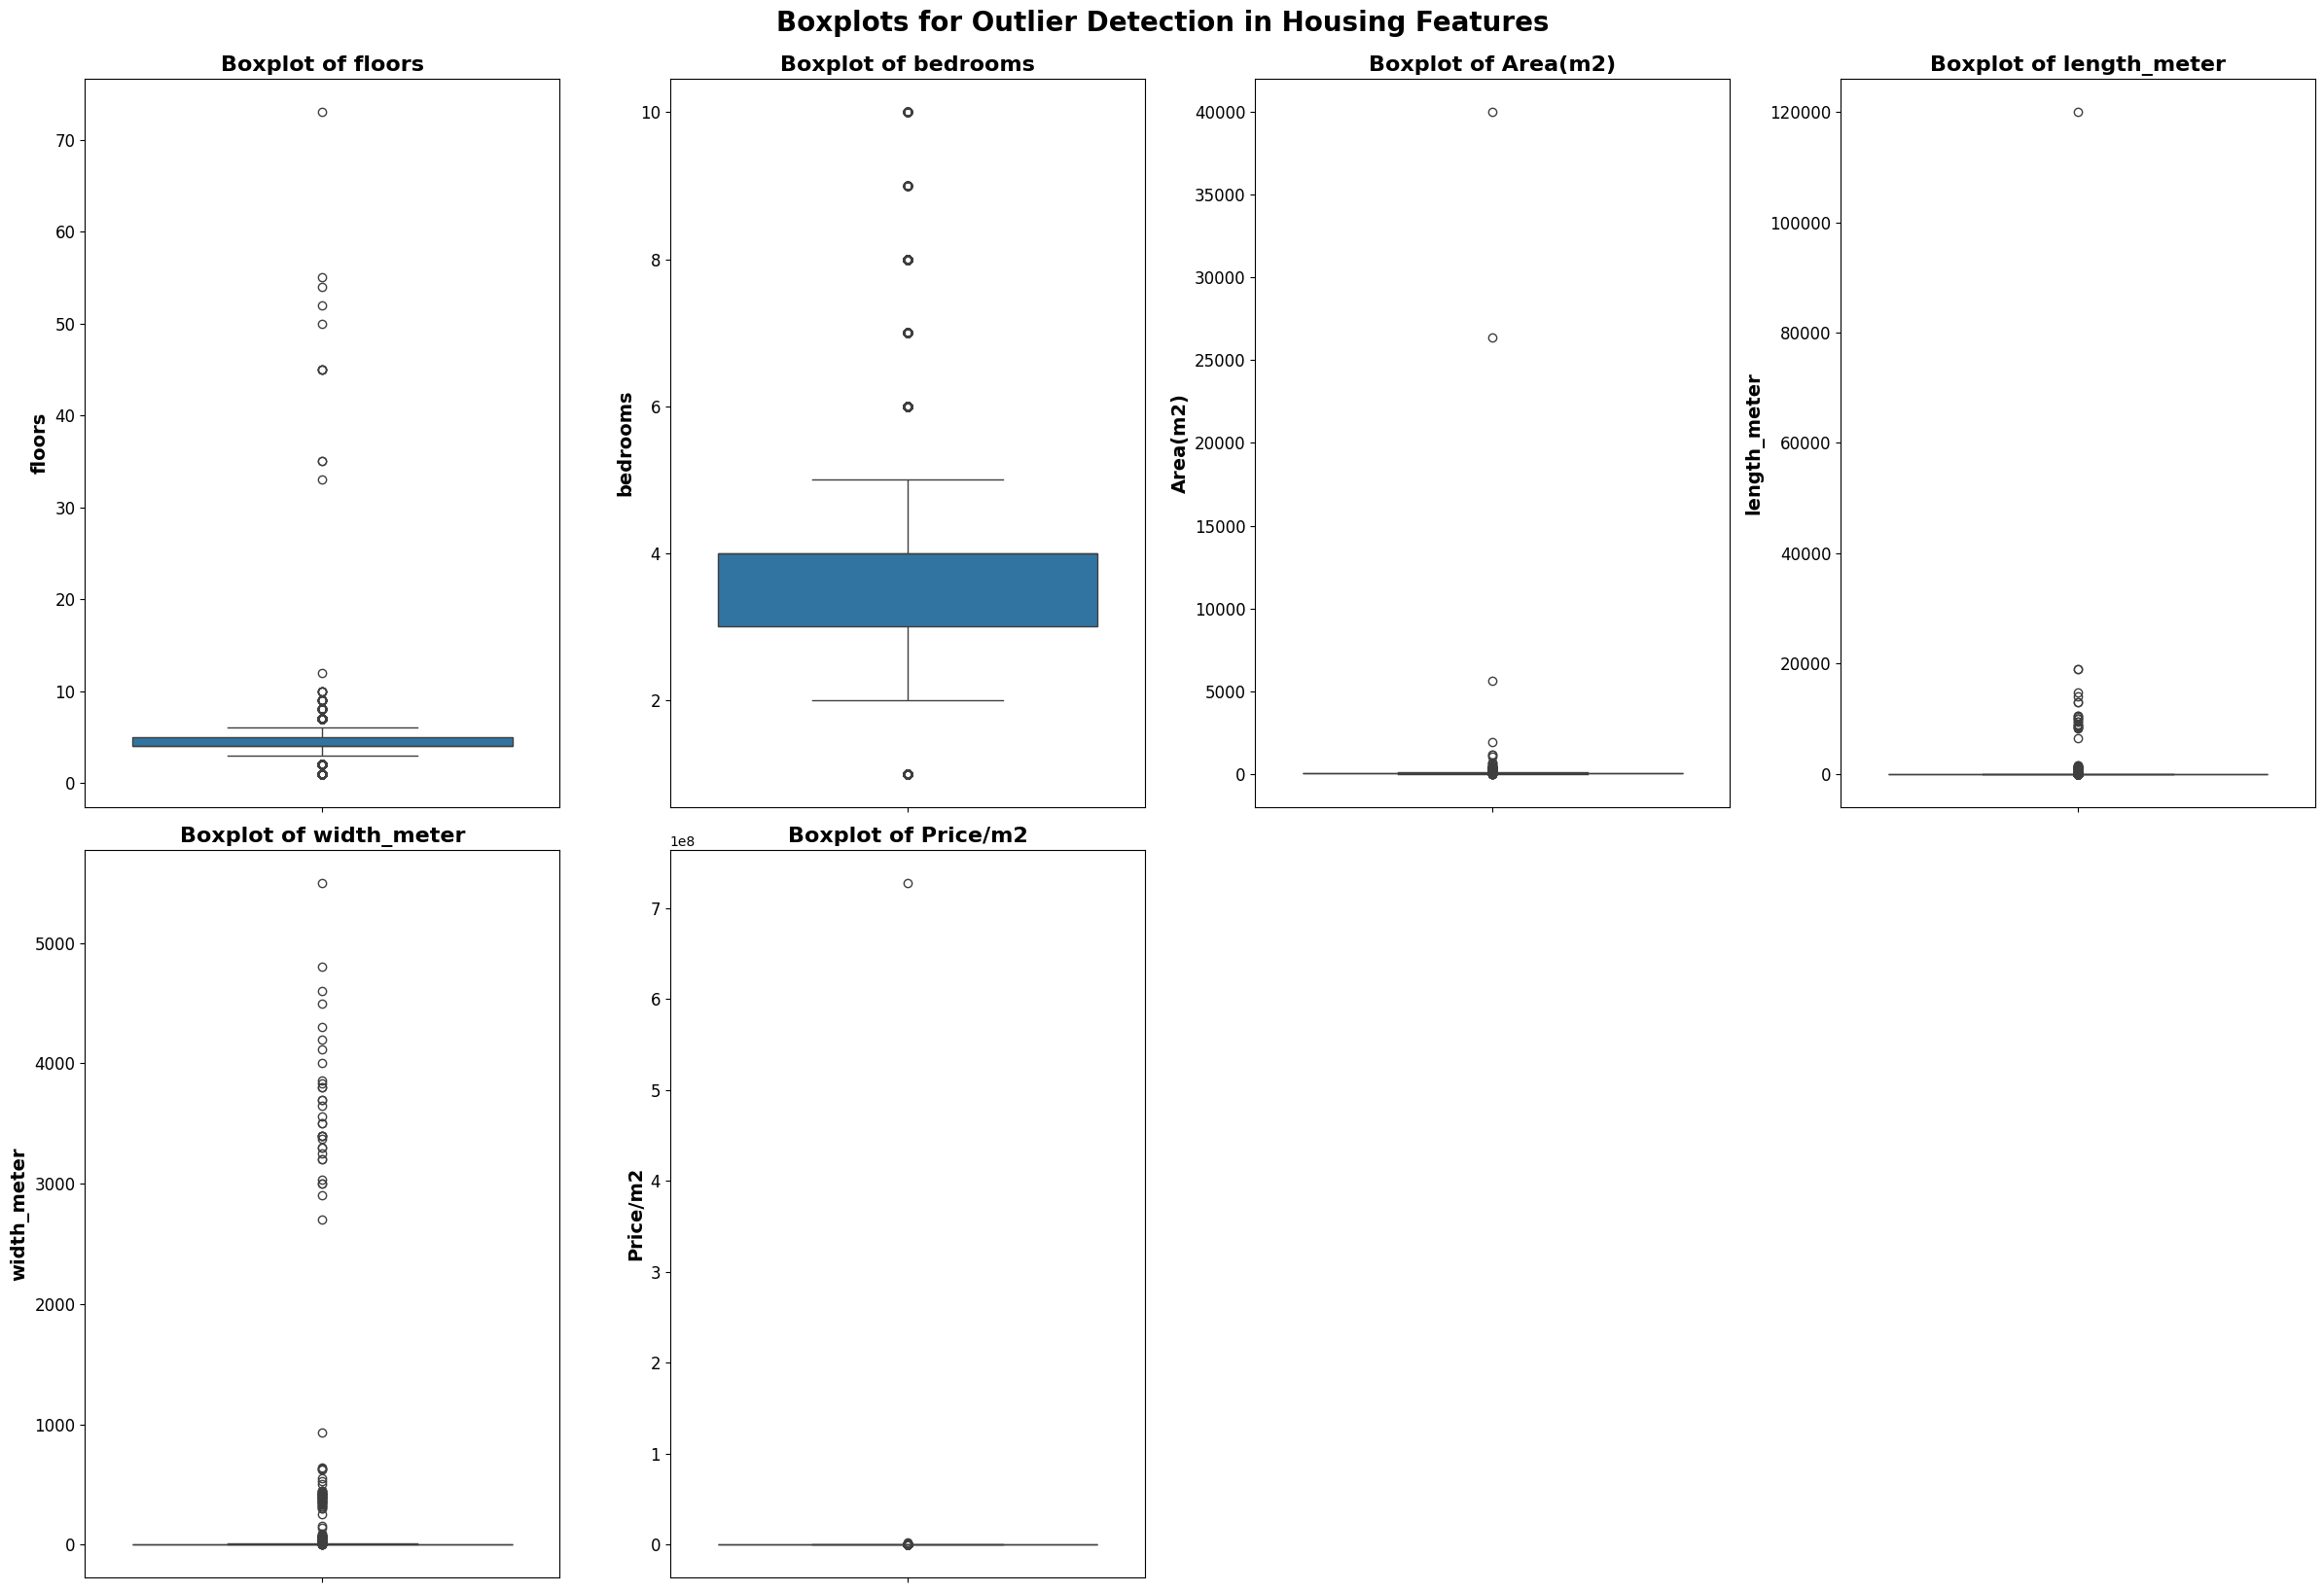

In [13]:
# Define the columns we want to plot
columns_to_plot = ['floors', 'bedrooms', 'Area(m2)', 'length_meter', 'width_meter', 'Price/m2']

# Calculate the number of rows and columns for the subplot grid
n_cols = 4
n_rows = math.ceil(len(columns_to_plot) / n_cols)

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 8 * n_rows))
fig.tight_layout(pad=5.0)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot boxplots for each selected column
for i, col in enumerate(columns_to_plot):
    sns.boxplot(data=df_housing, y=col, ax=axes[i])
    
    # Set clear X and Y labels
    axes[i].set_xlabel('', fontsize=14)  # X-axis label is not needed for vertical boxplots
    axes[i].set_ylabel(col, fontsize=14, fontweight='bold')
    
    # Set a clear title
    axes[i].set_title(f'Boxplot of {col}', fontsize=16, fontweight='bold')
    
    # Increase tick label size
    axes[i].tick_params(labelsize=12)
    
    # Rotate x-axis labels if they're overlapping
    plt.setp(axes[i].get_xticklabels(), rotation=45, ha='right')

# Remove any unused subplots
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Add a main title to the entire figure
fig.suptitle('Boxplots for Outlier Detection in Housing Features', fontsize=20, fontweight='bold', y=1.02)

plt.show()

## Removing outliers using IQR method


In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
def handle_outliers_iqr(df, columns):

    cleaned_df = df.copy()  # Create a copy to avoid modifying the original DataFrame

    for column in columns:
        if column not in df.columns:
            print(f"Warning: Column '{column}' not found in DataFrame. Skipping.")
            continue

        print(f"Cleaning column: {column}")
        print(f"Existing Min, Max Values: {df[column].agg([min, max])}")

        # Calculate IQR and bounds
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Identify and replace outliers
        cleaned_df[column] = df[column].apply(
            lambda x: np.nan if (x < lower_bound) or (x > upper_bound) or (x < 0) else x
        )

    return cleaned_df


In [16]:
df_housing

columns_to_remove_outliers = ['floors', 'bedrooms', 'Area(m2)', 'length_meter', 'width_meter', 'Price/m2']
for col in columns_to_remove_outliers:
    df_housing = handle_outliers_iqr(df_housing, [col]) # Pass only one column at a time
df_housing

Cleaning column: floors
Existing Min, Max Values: min     1.0
max    73.0
Name: floors, dtype: float64
Cleaning column: bedrooms
Existing Min, Max Values: min     1.0
max    10.0
Name: bedrooms, dtype: float64
Cleaning column: Area(m2)
Existing Min, Max Values: min        1.0
max    40000.0
Name: Area(m2), dtype: float64
Cleaning column: length_meter
Existing Min, Max Values: min         1.0
max    120000.0
Name: length_meter, dtype: float64
Cleaning column: width_meter
Existing Min, Max Values: min       1.0
max    5500.0
Name: width_meter, dtype: float64
Cleaning column: Price/m2
Existing Min, Max Values: min    5.408100e-02
max    7.280000e+08
Name: Price/m2, dtype: float64


,floors,bedrooms,Area(m2),length_meter,width_meter,Price/m2,housing_type_Nhà biệt thự,"housing_type_Nhà mặt phố, mặt tiền","housing_type_Nhà ngõ, hẻm",housing_type_Nhà phố liền kề,...,ward_Đại Mỗ,ward_Định Công,ward_Đống Mác,ward_Đồng Mai,ward_Đồng Nhân,ward_Đồng Tâ,ward_Đồng Xuân,ward_Đội Cấn,ward_Đức Giang,ward_Đức Thắng
0,4.0,4.0,40.0,10.0,4.0,65.00,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,4.0,52.0,12.0,4.2,93.27,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,5.0,NaN,18.0,5.0,108.89,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,3.0,32.0,6.6,4.5,60.94,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,2.0,42.0,11.0,4.0,29.76,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11467,6.0,NaN,65.0,13.0,5.0,NaN,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11468,NaN,2.0,37.0,13.0,3.0,43.24,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11470,5.0,4.0,80.0,14.0,5.0,NaN,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11471,3.0,5.0,NaN,NaN,4.0,NaN,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
print("\n After replace outliers with nan:",
    df_housing.isna().sum().sum())


 After replace outliers with nan: 5851


# Fillna using MICE method

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [19]:
columns_to_fill = ['floors', 'bedrooms', 'Area(m2)', 'length_meter', 'width_meter', 'Price/m2']
missing_columns = df_housing.columns[df_housing.isnull().any()].tolist()

# Create binary indicators for NaN
for col in missing_columns:
    df_housing[f"{col}_missing"] = df_housing[col].isnull().astype(int)

# MICE imputation using IterativeImputer
mice_imputer = IterativeImputer(random_state=0, max_iter=10)
df_housing[columns_to_fill] = mice_imputer.fit_transform(df_housing[columns_to_fill])

In [20]:
df_final = df_housing
df_final

,floors,bedrooms,Area(m2),length_meter,width_meter,Price/m2,housing_type_Nhà biệt thự,"housing_type_Nhà mặt phố, mặt tiền","housing_type_Nhà ngõ, hẻm",housing_type_Nhà phố liền kề,...,ward_Đồng Xuân,ward_Đội Cấn,ward_Đức Giang,ward_Đức Thắng,floors_missing,bedrooms_missing,Area(m2)_missing,length_meter_missing,width_meter_missing,Price/m2_missing
0,4.000000,4.000000,40.000000,10.000000,4.0,65.000000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5.000000,4.000000,52.000000,12.000000,4.2,93.270000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,5.000000,5.000000,80.427833,18.000000,5.0,108.890000,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4.000000,3.000000,32.000000,6.600000,4.5,60.940000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,3.000000,2.000000,42.000000,11.000000,4.0,29.760000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11467,6.000000,4.811994,65.000000,13.000000,5.0,120.248544,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
11468,3.404966,2.000000,37.000000,13.000000,3.0,43.240000,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
11470,5.000000,4.000000,80.000000,14.000000,5.0,103.585676,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
11471,3.000000,5.000000,56.013151,13.482364,4.0,77.216217,0,1,0,0,...,0,0,0,0,0,0,1,1,0,1


## EDA Feature Engineering

In [21]:
def Column_Info(df,column):
    print("Details of",column,"column")
    
    # DataType 
    print("\nDataType: ",df[column].dtype)
    
    #Check Nah
    count_null = df[column].isna().sum()
    if count_null == 0:
        print("\nThere are no null values")
    elif count_null > 0:
        print("\nThere are ",count_null," null values")
        
    # count Unique Values
    print("\nNumber of Unique Values: ",df[column].nunique())
    
    # Get AttributesAttributes of Column    
    print("\nDistribution of column:\n")
    print(df[column].value_counts())

In [22]:
df_final.columns

Index(['floors', 'bedrooms', 'Area(m2)', 'length_meter', 'width_meter',
       'Price/m2', 'housing_type_Nhà biệt thự',
       'housing_type_Nhà mặt phố, mặt tiền', 'housing_type_Nhà ngõ, hẻm',
       'housing_type_Nhà phố liền kề',
       ...
       'ward_Đồng Xuân', 'ward_Đội Cấn', 'ward_Đức Giang', 'ward_Đức Thắng',
       'floors_missing', 'bedrooms_missing', 'Area(m2)_missing',
       'length_meter_missing', 'width_meter_missing', 'Price/m2_missing'],
      dtype='object', length=287)

In [23]:
print(Column_Info(df_final, 'Price/m2'))
print(Column_Info(df_final, 'floors'))
print(Column_Info(df_final, 'Area(m2)'))
print(Column_Info(df_final, 'bedrooms'))



Details of Price/m2 column

DataType:  float64

There are no null values

Number of Unique Values:  3411

Distribution of column:

Price/m2
100.000000    308
80.000000     141
75.000000     117
83.330000     106
70.000000     101
             ... 
40.590000       1
106.520000      1
89.360000       1
78.974386       1
77.216217       1
Name: count, Length: 3411, dtype: int64
None
Details of floors column

DataType:  float64

There are no null values

Number of Unique Values:  865

Distribution of column:

floors
5.000000    4689
4.000000    3856
3.000000    1244
6.000000     612
4.409580       5
            ... 
4.472676       1
3.743608       1
3.405894       1
3.464863       1
3.404966       1
Name: count, Length: 865, dtype: int64
None
Details of Area(m2) column

DataType:  float64

There are no null values

Number of Unique Values:  764

Distribution of column:

Area(m2)
40.000000    942
30.000000    855
35.000000    829
45.000000    644
50.000000    643
            ... 
52.532370 

## DISTRIBUTIONION OF  VARIABLES

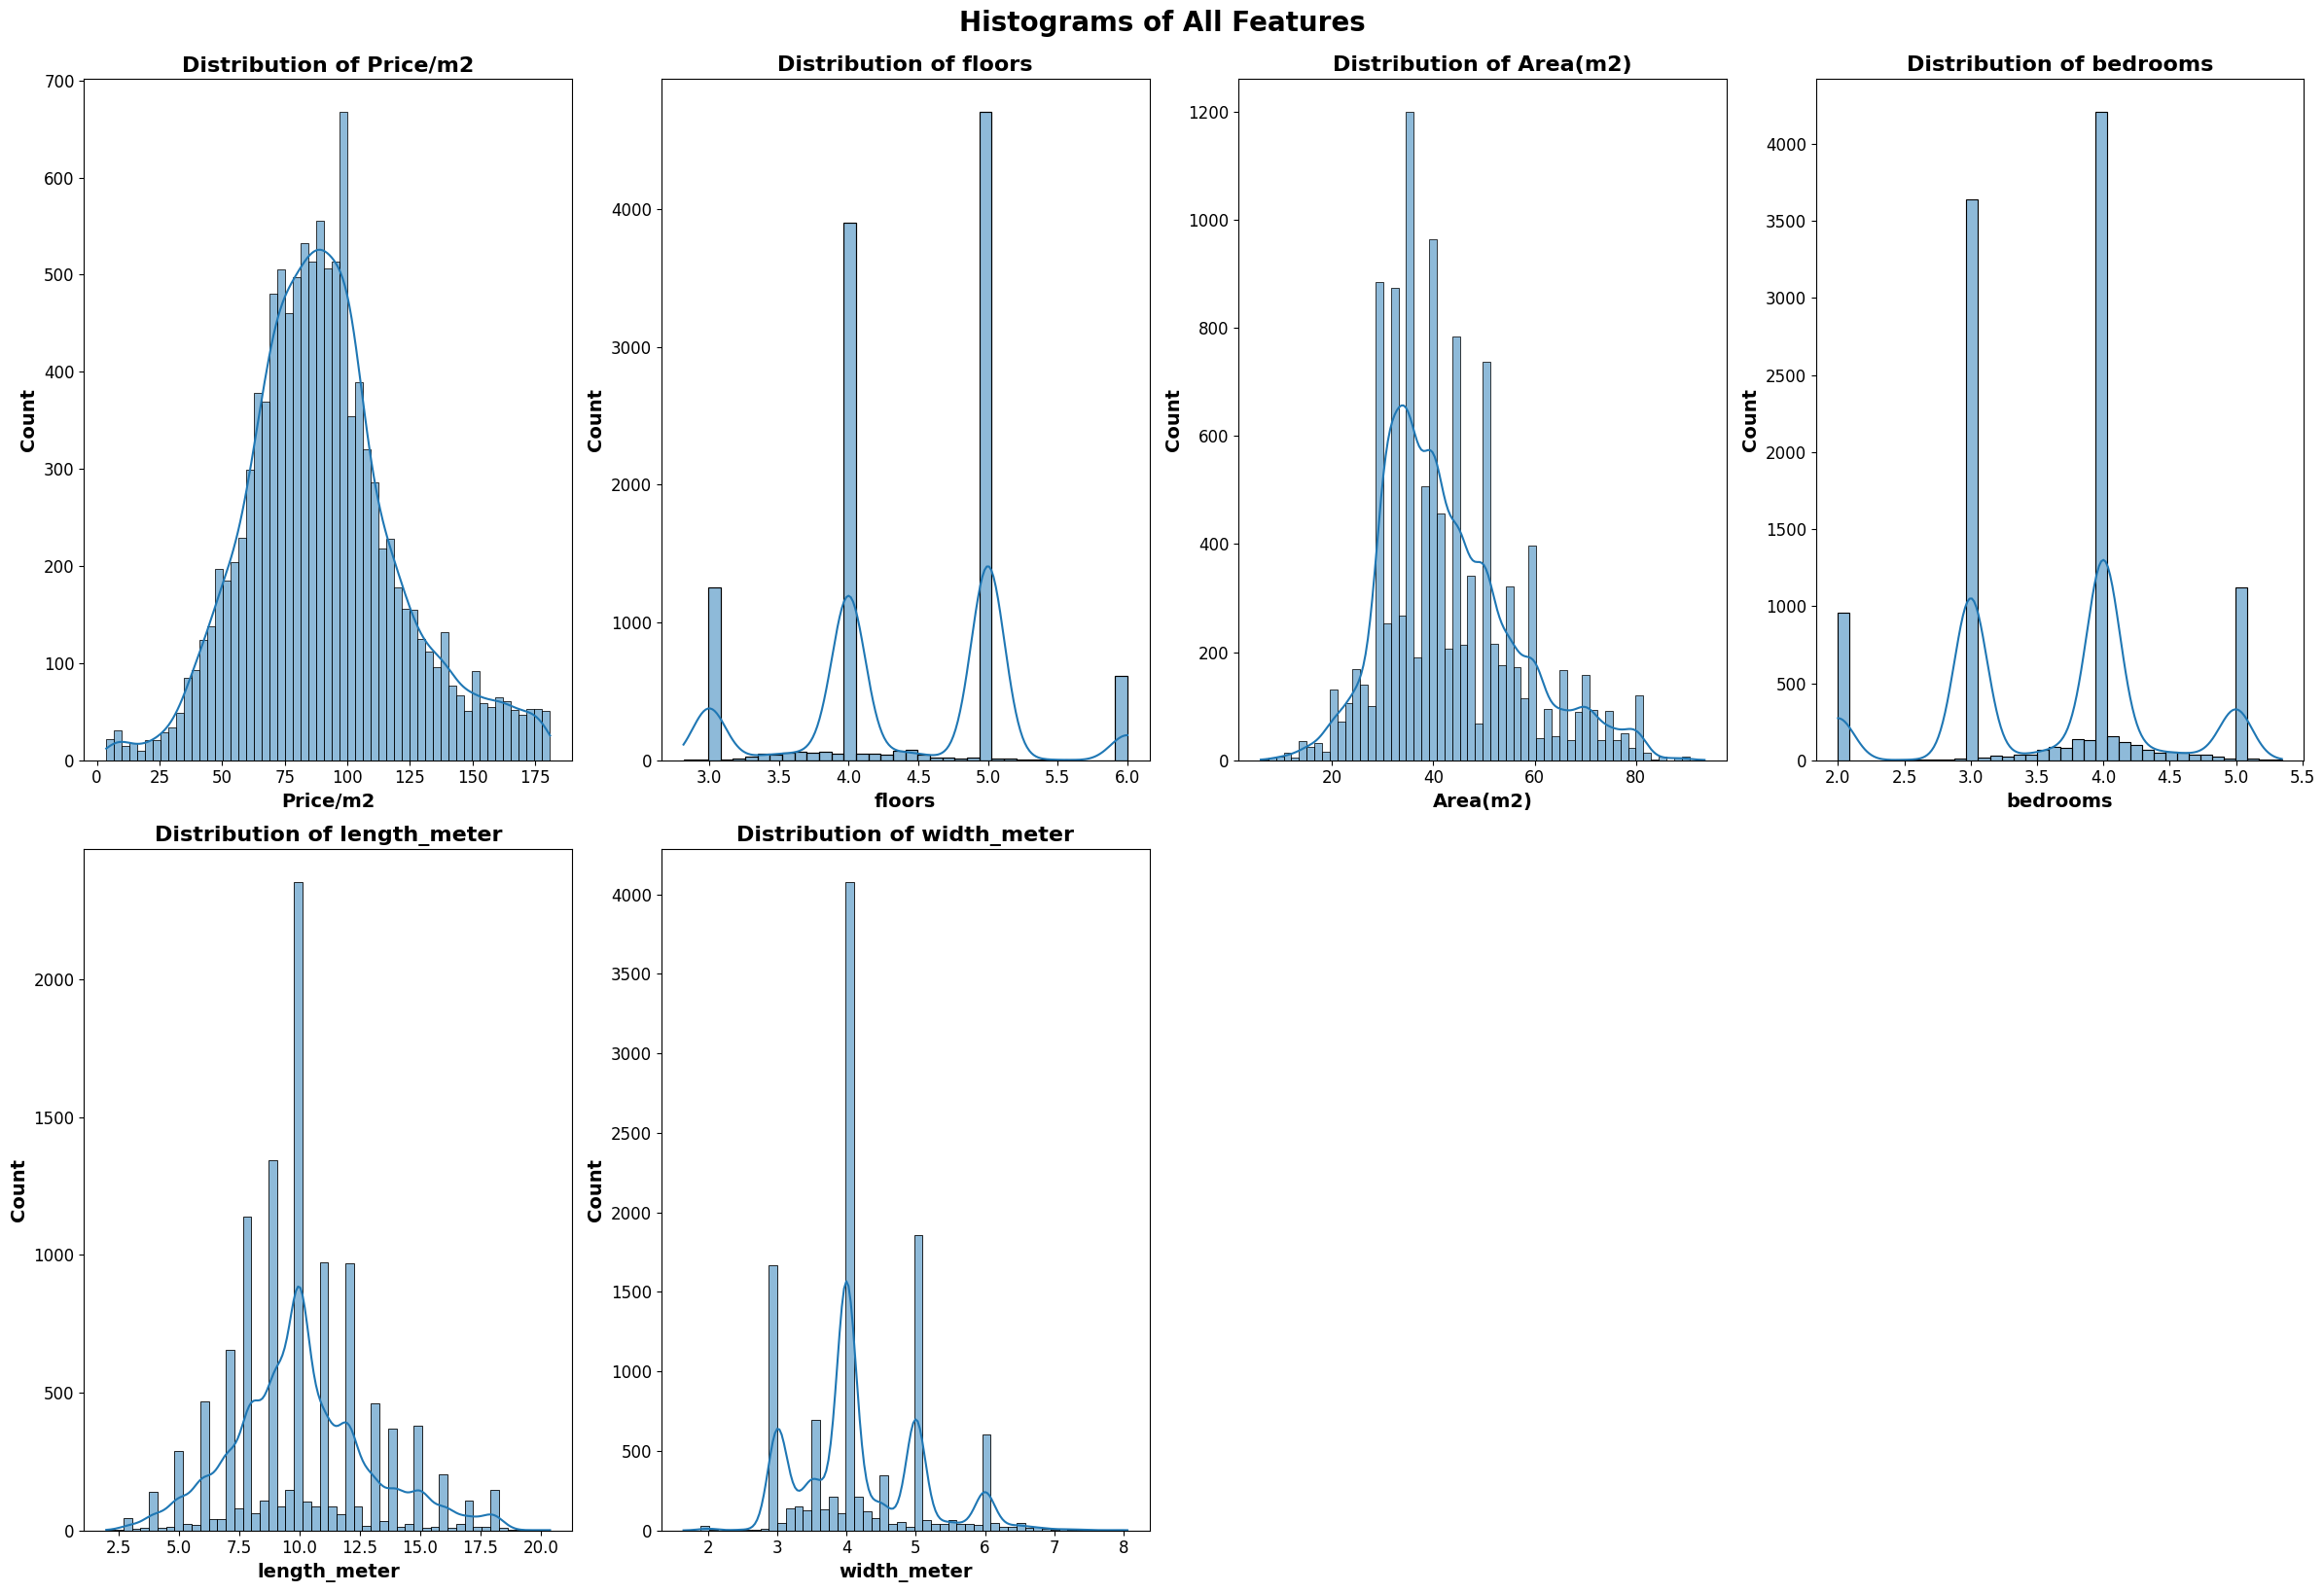

In [24]:
# Calculate the number of rows and columns for the subplot grid
important_columns = ['Price/m2', 'floors', 'Area(m2)', 'bedrooms', 'length_meter', 'width_meter']
for col in important_columns:
    n_cols = 4
    n_rows = math.ceil(len(important_columns) / n_cols)

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 8 * n_rows))
fig.tight_layout(pad=5.0)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot histplots for each column
for i, col in enumerate(important_columns):
    sns.histplot(data=df_final, x=col, ax=axes[i], kde=True)
    
    # Set clear X and Y labels
    axes[i].set_xlabel(col, fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Count', fontsize=14, fontweight='bold')
    
    # Set a clear title
    axes[i].set_title(f'Distribution of {col}', fontsize=16, fontweight='bold')
    
    # Increase tick label size
    axes[i].tick_params(labelsize=12)

# Remove any unused subplots
for j in range(len(important_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Add a main title to the entire figure
fig.suptitle('Histograms of All Features', fontsize=20, fontweight='bold', y=1.02)

plt.show()

## SCATTERPLOT FOR FEATURES'S RELATIONSHIP

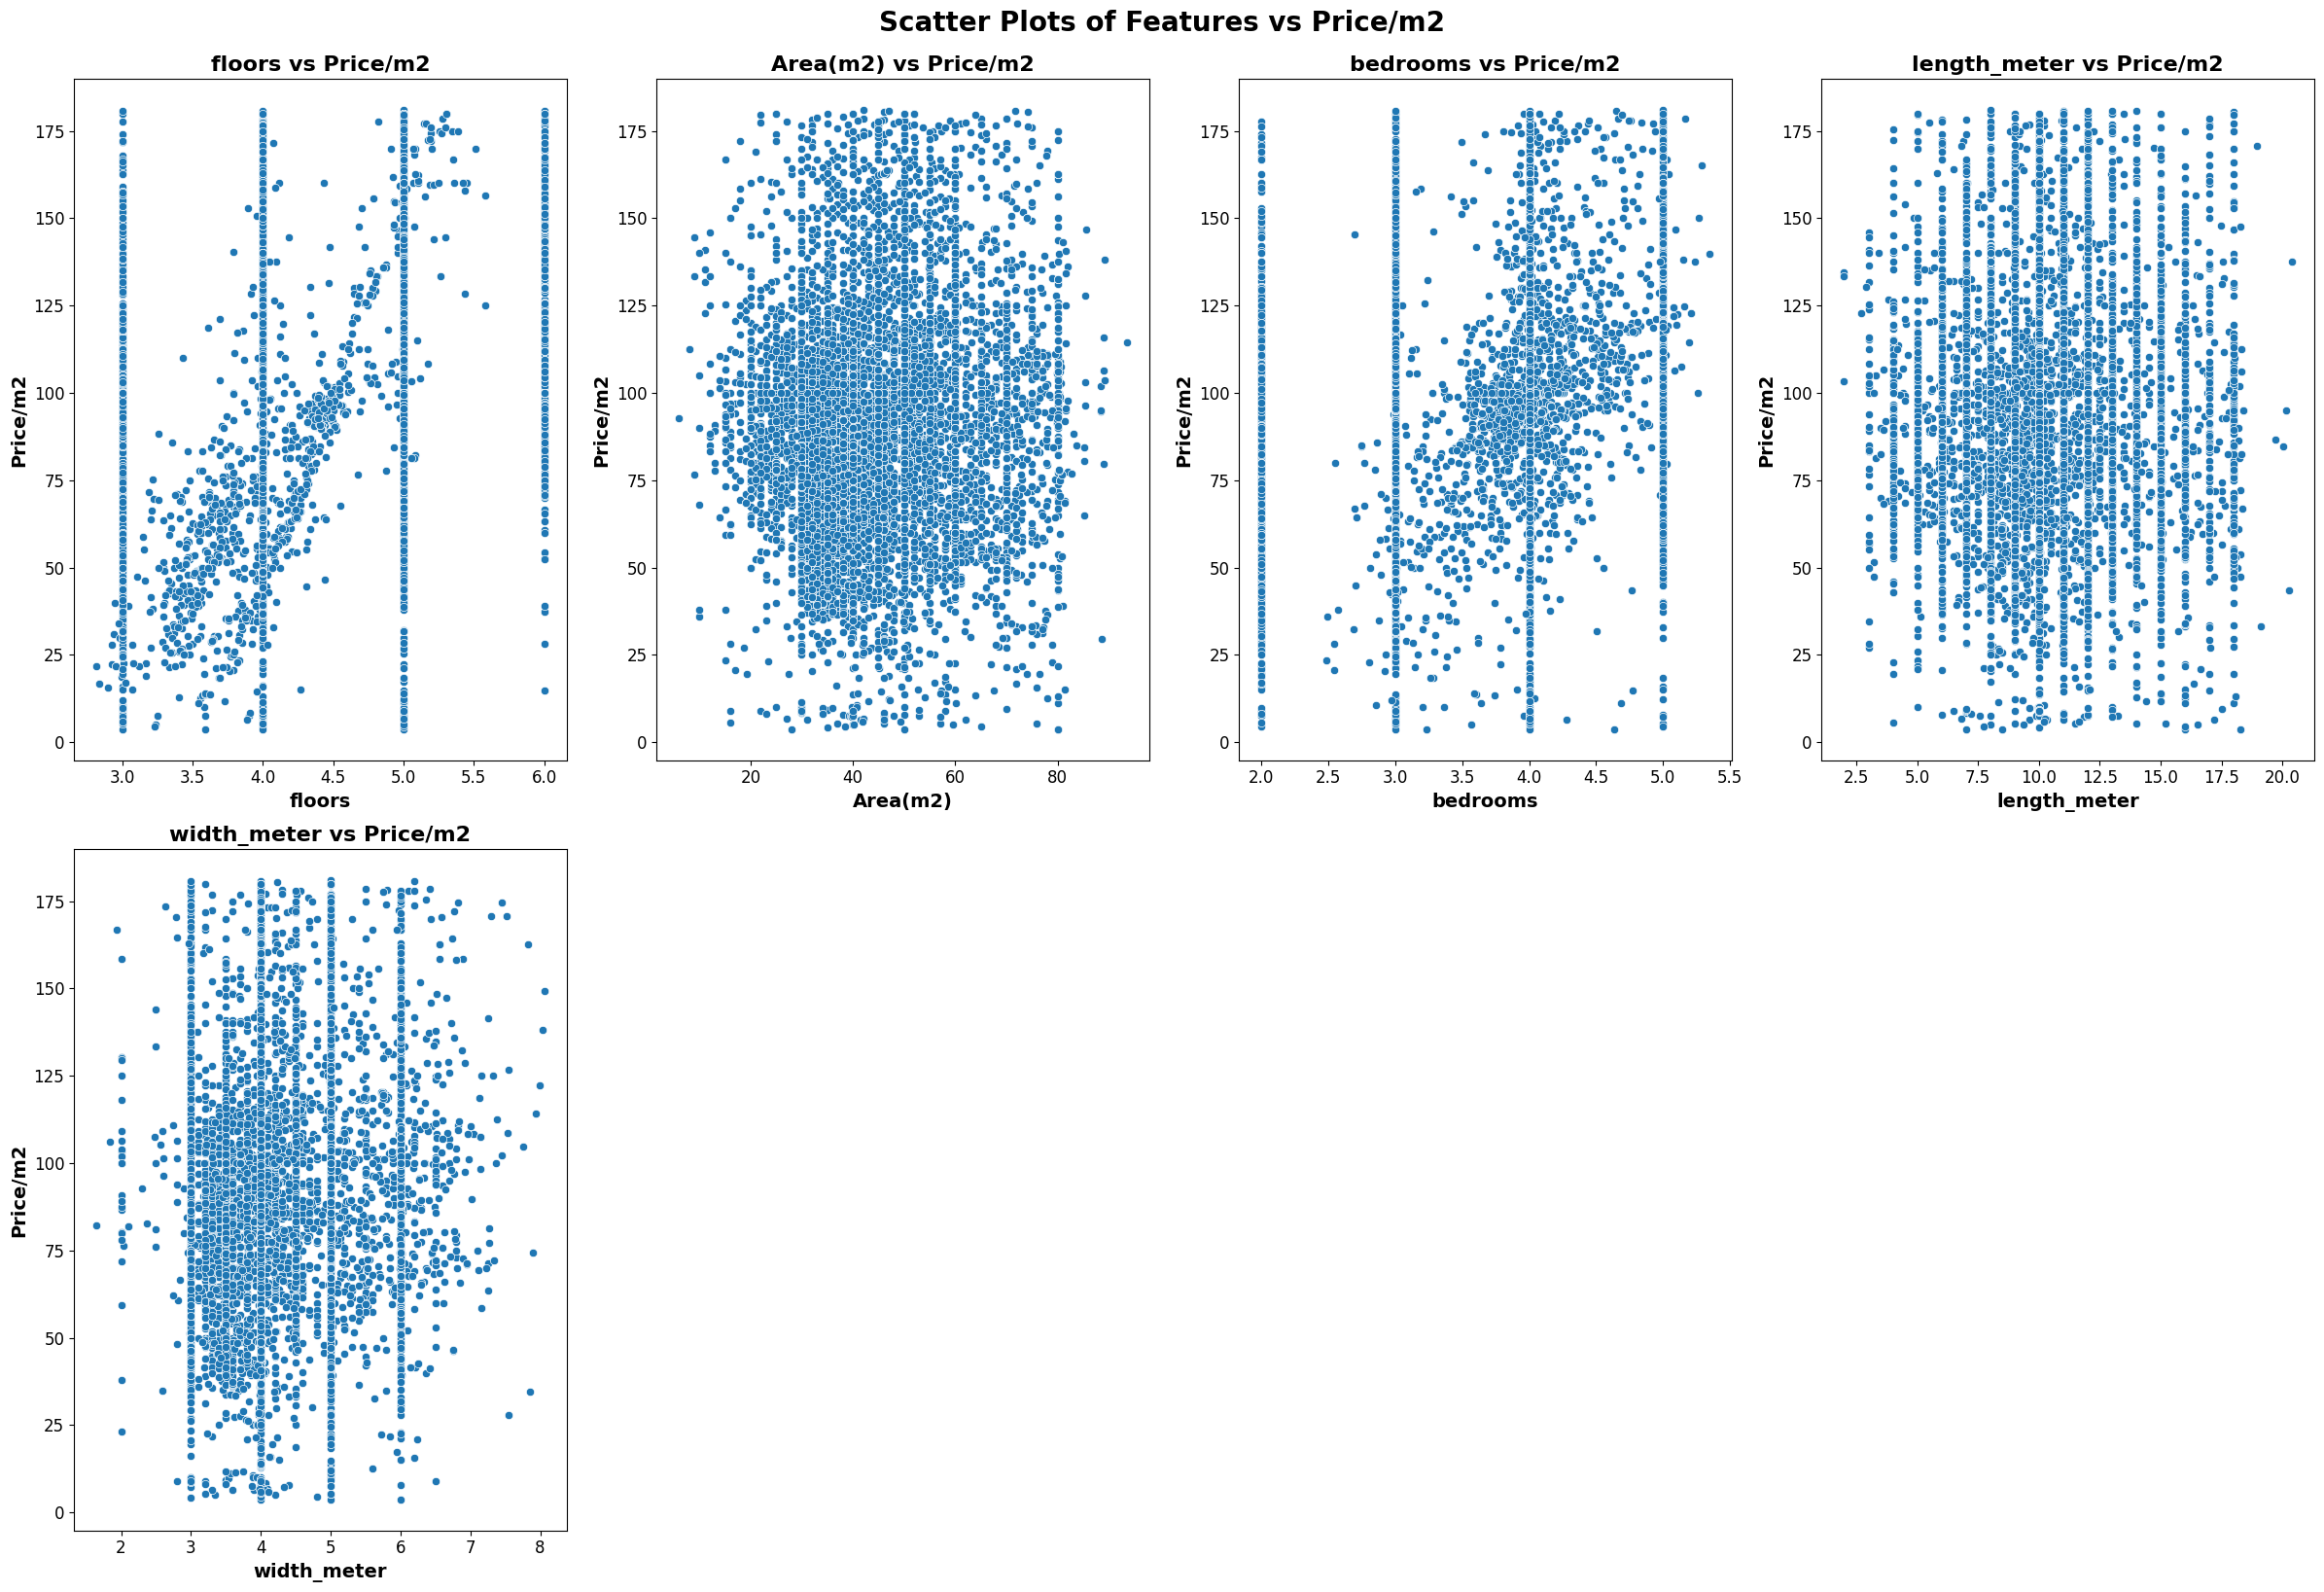

In [25]:
important_columns = ['Price/m2', 'floors', 'Area(m2)', 'bedrooms', 'length_meter', 'width_meter']
for col in important_columns:
    n_cols = 4
    n_rows = math.ceil((len(important_columns) - 1) / n_cols)
# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 8 * n_rows))
fig.tight_layout(pad=6.0)
# Flatten the axes array for easier indexing
axes = axes.flatten()
# Plot scatter plots for each column against 'label'
i = 0
for col in important_columns:
        if col != 'Price/m2':
            sns.scatterplot(data=df_final, x=col, y='Price/m2', ax=axes[i])
        # Set clear X and Y labels
            axes[i].set_xlabel(col, fontsize=14, fontweight='bold')
            axes[i].set_ylabel('Price/m2', fontsize=14, fontweight='bold')
        # Set a clear title
            axes[i].set_title(f'{col} vs Price/m2', fontsize=16, fontweight='bold')
        # Increase tick label size
            axes[i].tick_params(labelsize=12)
        
            i += 1
# Remove any unused subplots
for j in range(i, len(axes)):
        fig.delaxes(axes[j])

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Add a main title to the entire figure
fig.suptitle('Scatter Plots of Features vs Price/m2', fontsize=20, fontweight='bold', y=1.02)

plt.show()

## SCALE DATA AND BUILD MODEL

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import  GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score, KFold


In [54]:
X = df_final.drop(columns = 'Price/m2').values
y = df_final['Price/m2'].values

In [55]:
scaler = StandardScaler()

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

X_train.shape, X_test.shape

((9050, 286), (2263, 286))

In [63]:
X_train, y_train = df_final.drop(columns = 'Price/m2').values, df_final['Price/m2'].values
X_train = scaler.fit_transform(X_train)

Evaluate the Optimal model between LinearRegression vs RandomForestRegressor 

In [64]:
X_test, y_test = df_final.drop(columns = 'Price/m2').values, df_final['Price/m2'].values
X_test = scaler.transform(X_test)

In [65]:
from sklearn.model_selection import cross_val_score, KFold

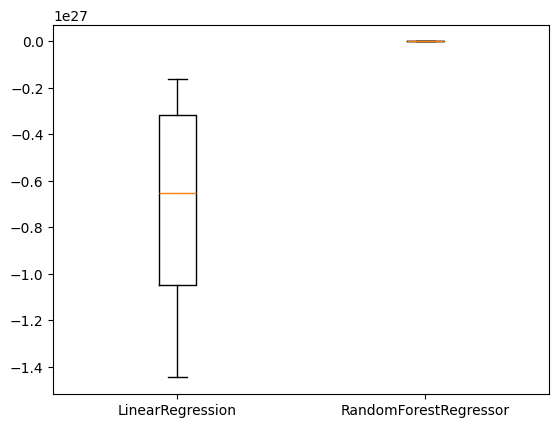

In [66]:
models = {"LinearRegression": LinearRegression(), "RandomForestRegressor": RandomForestRegressor()}
results = []
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

In [67]:
for name, model in models.items():
    model.fit(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print("{}  Accuracy: {}".format(name, test_score))

LinearRegression  Accuracy: 0.4418810305599713
RandomForestRegressor  Accuracy: 0.9238934291054283


=> THE OPTIMAL MODEL WOULD BE RandomForestRegressor

Try Model RandomForestRegressor

In [68]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
predictions = forest.predict(X_test)

In [69]:
#CHECK ACCURACY
score = r2_score(y_test, predictions)
print("The accuracy of the RandomForestRegressor model is {}%".format(round(score, 2) *100))

The accuracy of the RandomForestRegressor model is 92.0%


In [72]:
importances = forest.feature_importances_
feature_importance = sorted(zip(importances, range(X_train.shape[1])), reverse=True)
print("\nTop 10 important features:")
for importance, index in feature_importance[:10]:
    print(f"Feature {index}: {importance:.4f}")


Top 10 important features:
Feature 0: 0.1838
Feature 2: 0.1226
Feature 3: 0.0789
Feature 4: 0.0621
Feature 1: 0.0597
Feature 7: 0.0378
Feature 280: 0.0315
Feature 31: 0.0280
Feature 262: 0.0219
Feature 37: 0.0177


## RESULT

In [78]:
# RandomForestRegressor result
predictions = pd.DataFrame(predictions)
predictions.rename(columns = {0:'Predicted Price(RandomForestRegressor)'}, inplace = True)


In [91]:
# Actual price
y_test = pd.DataFrame(y_test)
y_test.rename(columns = {0:'Actual Price'}, inplace = True)
y_test = y_test.reset_index(drop=True)


In [80]:
# result
df_result = y_test.join(predictions)
df_result

,Actual Price,Predicted Price(RandomForestRegressor)
0,65.000000,67.639623
1,93.270000,93.241365
2,108.890000,102.536800
3,60.940000,64.265900
4,29.760000,35.537300
...,...,...
11308,120.248544,118.319483
11309,43.240000,42.564827
11310,103.585676,103.673329
11311,77.216217,77.564626


VISUALIZE THE RESULT (Using the first 10 result from each columns)

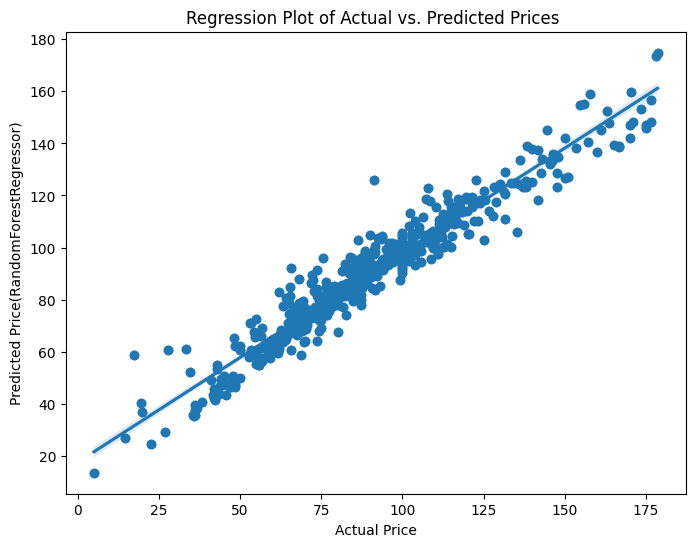

In [89]:
# Visualizations
# Sample a subset of the data for plotting (e.g., 500 points)
sample_size = 500
df_sample = df_result.sample(n=sample_size, random_state=42)

# Visualizations
plt.figure(figsize=(8, 6))
plt.scatter(df_sample['Actual Price'], df_sample['Predicted Price(RandomForestRegressor)'])
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
sns.regplot(x="Actual Price", y="Predicted Price(RandomForestRegressor)", data=df_sample)
plt.title("Regression Plot of Actual vs. Predicted Prices ")
plt.show()

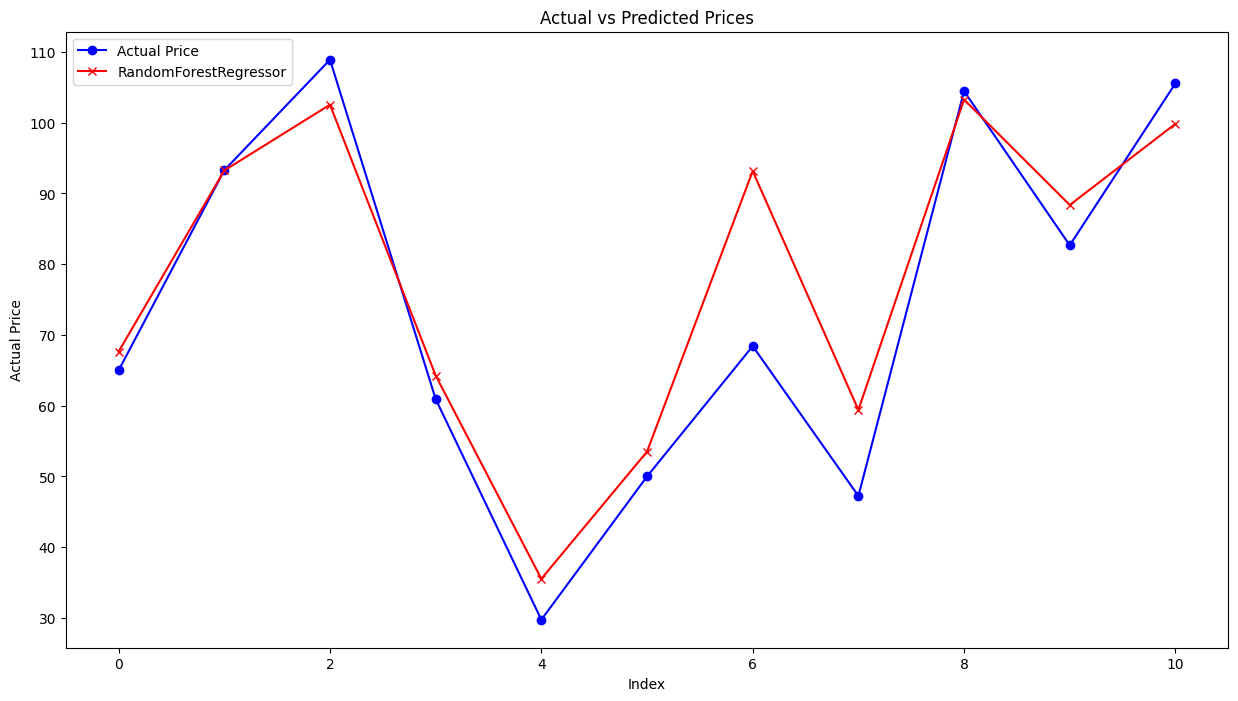

In [90]:
plt.subplots(figsize = (15,8))
plt.plot(y_test.loc[:10,:],label = 'Actual Price', color = 'b',marker='o')
plt.plot(predictions.loc[:10,:], label = 'RandomForestRegressor', color = 'r',marker='x')
# give labels and title
plt.xlabel("Index")
plt.ylabel("Actual Price")
plt.title('Actual vs Predicted Prices')
# give legend
plt.legend()

plt.show()